In [5]:
!pip install autoviz

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv('ASPR_Treatments_Locator_20250124.csv')
data.head(5)

Provider Name                Address 1           Address 2  \
0    CVS PHARMACY #05246                    110 HWY 98     NaN     
1  PUBLIX PHARMACY #0567    2517 SOUTH FEDERAL HIGHWAY     NaN     
2        WALGREENS #4379                4320 26TH ST W     NaN     
3  PUBLIX PHARMACY #0894          6820 OKEECHOBEE BLVD     NaN     
4  PUBLIX PHARMACY #0019  731 DUVAL STATION RD SUITE 4     NaN     

        City       State     Zip      Public Phone  Latitude   Longitude  \
0   PORT SAINT JOE   FL        32456           NaN  30.016430 -85.430510   
1        FT PIERCE   FL        34982           NaN  27.319630 -80.316317   
2        BRADENTON   FL   34205-3563  941-755-8596  27.462954 -82.588373   
3  WEST PALM BEACH   FL        33411           NaN  26.705894 -80.150789   
4     JACKSONVILLE   FL        32218           NaN  30.485316 -81.604614   

             Geopoint               Last Report Date     Is PAP Site  \
0    POINT (-85.43051 30.01643)  01/17/2025 12:00:00 AM     True       
1   POINT (-80.316317 27.31963)  01/17/2025 12:00:00 AM     True       
2  POINT (-82.588373 27.462954)  01/17/2025 12:00:00 AM     True       
3  POINT (-80.150789 26.705894)  01/17/2025 12:00:00 AM     True       
4  POINT (-81.604614 30.485316)  01/17/2025 12:00:00 AM     True       

  Prescribing Services Available Appointment URL  Home Delivery  \
0               NaN                     NaN           False       
1               NaN                     NaN           False       
2               NaN                     NaN           False       
3               NaN                     NaN           False       
4               NaN                     NaN           False       

   Is ICATT Site  Has USG Product  Has Commercial Product  Has Paxlovid  \
0      False           False                False              False      
1      False           False                False              False      
2      False           False                 True              False      
3      False           False                False              False      
4      False           False                False              False      

   Has Commercial Paxlovid  Has USG Paxlovid  Has Lagevrio  \
0           False                 False           False      
1           False                 False           False      
2           False                 False           False      
3           False                 False           False      
4           False                 False           False      

   Has Commercial Lagevrio  Has USG Lagevrio  Has Veklury  \
0           False                 False          False      
1           False                 False          False      
2           False                 False          False      
3           False                 False          False      
4           False                 False          False      

   Has Oseltamivir Generic  Has Oseltamivir Suspension  \
0           False                      False             
1           False                      False             
2            True                      False             
3           False                      False             
4           False                      False             

   Has Oseltamivir Tamiflu  Has Baloxavir  Has Zanamivir  Has Peramivir  \
0           False               False          False          False       
1           False               False          False          False       
2           False               False          False          False       
3           False               False          False          False       
4           False               False          False          False       

  Grantee Code  Is Flu  Is COVID-19  
0      CV1       False     True      
1      PX1       False     True      
2      WG1        True     True      
3      PX1       False     True      
4      PX1       False     True

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65848 entries, 0 to 65847
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Provider Name                   65848 non-null  object 
 1   Address 1                       65847 non-null  object 
 2   Address 2                       7373 non-null   object 
 3   City                            65847 non-null  object 
 4   State                           65847 non-null  object 
 5   Zip                             65847 non-null  object 
 6   Public Phone                    20559 non-null  object 
 7   Latitude                        65848 non-null  float64
 8   Longitude                       65848 non-null  float64
 9   Geopoint                        65848 non-null  object 
 10  Last Report Date                65847 non-null  object 
 11  Is PAP Site                     65848 non-null  bool   
 12  Prescribing Services Available  

In [9]:
data.isna().sum().sort_values()

Provider Name                         0
Has Peramivir                         0
Has Zanamivir                         0
Has Baloxavir                         0
Has Oseltamivir Tamiflu               0
Has Oseltamivir Suspension            0
Has Oseltamivir Generic               0
Has Veklury                           0
Has USG Lagevrio                      0
Has Commercial Lagevrio               0
Has Lagevrio                          0
Has USG Paxlovid                      0
Has Commercial Paxlovid               0
Has Paxlovid                          0
Has Commercial Product                0
Is Flu                                0
Has USG Product                       0
Home Delivery                         0
Is ICATT Site                         0
Latitude                              0
Longitude                             0
Geopoint                              0
Is COVID-19                           0
Is PAP Site                           0
Zip                                   1
State                                 1
City                                  1
Address 1                             1
Last Report Date                      1
Grantee Code                      20374
Public Phone                      45289
Address 2                         58475
Prescribing Services Available    64954
Appointment URL                   65354
dtype: int64

In [10]:
na_feature = [feature for feature in data.columns if data[feature].isna().sum()>1]

for feature in na_feature:
    print(f"{feature}:{data[feature].isna().mean()*100:.3f}%missing value")

Address 2:88.803%missing value
Public Phone:68.778%missing value
Prescribing Services Available:98.642%missing value
Appointment URL:99.250%missing value
Grantee Code:30.941%missing value


In [22]:
data['Prescribing Services Available'].value_counts()

Prescribing Services Available
True     494
False    400
Name: count, dtype: int64

In [11]:
data.describe(include = 'all').T

count   unique  \
Provider Name                     65848  58285   
Address 1                         65847  63078   
Address 2                          7373   2181   
City                              65847   8952   
State                             65847     55   
Zip                               65847  44390   
Public Phone                      20559  20502   
Latitude                        65848.0    NaN   
Longitude                       65848.0    NaN   
Geopoint                          65848  63661   
Last Report Date                  65847    981   
Is PAP Site                       65848      2   
Prescribing Services Available      894      2   
Appointment URL                     494      1   
Home Delivery                     65848      2   
Is ICATT Site                     65848      2   
Has USG Product                   65848      2   
Has Commercial Product            65848      2   
Has Paxlovid                      65848      2   
Has Commercial Paxlovid           65848      2   
Has USG Paxlovid                  65848      2   
Has Lagevrio                      65848      2   
Has Commercial Lagevrio           65848      2   
Has USG Lagevrio                  65848      2   
Has Veklury                       65848      2   
Has Oseltamivir Generic           65848      2   
Has Oseltamivir Suspension        65848      2   
Has Oseltamivir Tamiflu           65848      2   
Has Baloxavir                     65848      2   
Has Zanamivir                     65848      1   
Has Peramivir                     65848      1   
Grantee Code                      45474     78   
Is Flu                            65848      2   
Is COVID-19                       65848      2   

                                             top                 freq   \
Provider Name                                      HEB PHARMACY    259   
Address 1                                         101 N MAIN ST     10   
Address 2                                          CVS Pharmacy   2114   
City                                                   BROOKLYN    845   
State                                                        CA   6190   
Zip                                                       11214     32   
Public Phone                                       559-646-6618     23   
Latitude                                                    NaN    NaN   
Longitude                                                   NaN    NaN   
Geopoint                            POINT (-104.87489 40.89497)      9   
Last Report Date                         01/17/2025 12:00:00 AM  61160   
Is PAP Site                                                True  61532   
Prescribing Services Available                             True    494   
Appointment URL                 https://www.cvs.com/coronavirus    494   
Home Delivery                                             False  65564   
Is ICATT Site                                             False  65823   
Has USG Product                                           False  64717   
Has Commercial Product                                    False  45513   
Has Paxlovid                                              False  48965   
Has Commercial Paxlovid                                   False  49201   
Has USG Paxlovid                                          False  65612   
Has Lagevrio                                              False  57412   
Has Commercial Lagevrio                                   False  58190   
Has USG Lagevrio                                          False  64920   
Has Veklury                                               False  65829   
Has Oseltamivir Generic                                   False  46729   
Has Oseltamivir Suspension                                False  56390   
Has Oseltamivir Tamiflu                                   False  65134   
Has Baloxavir                                             False  62648   
Has Zanamivir                                             Fal

In [12]:
# numerical feature

numerical_feature = [feature for feature in data.columns if data[feature].dtypes != 'object']
print("no. of numerical column: ",len(numerical_feature))
data[numerical_feature].head()

no. of numerical column:  22


Latitude   Longitude  Is PAP Site  Home Delivery  Is ICATT Site  \
0  30.016430 -85.430510     True          False          False       
1  27.319630 -80.316317     True          False          False       
2  27.462954 -82.588373     True          False          False       
3  26.705894 -80.150789     True          False          False       
4  30.485316 -81.604614     True          False          False       

   Has USG Product  Has Commercial Product  Has Paxlovid  \
0       False                False              False      
1       False                False              False      
2       False                 True              False      
3       False                False              False      
4       False                False              False      

   Has Commercial Paxlovid  Has USG Paxlovid  Has Lagevrio  \
0           False                 False           False      
1           False                 False           False      
2           False                 False           False      
3           False                 False           False      
4           False                 False           False      

   Has Commercial Lagevrio  Has USG Lagevrio  Has Veklury  \
0           False                 False          False      
1           False                 False          False      
2           False                 False          False      
3           False                 False          False      
4           False                 False          False      

   Has Oseltamivir Generic  Has Oseltamivir Suspension  \
0           False                      False             
1           False                      False             
2            True                      False             
3           False                      False             
4           False                      False             

   Has Oseltamivir Tamiflu  Has Baloxavir  Has Zanamivir  Has Peramivir  \
0           False               False          False          False       
1           False               False          False          False       
2           False               False          False          False       
3           False               False          False          False       
4           False               False          False          False       

   Is Flu  Is COVID-19  
0   False     True      
1   False     True      
2    True     True      
3   False     True      
4   False     True

In [13]:
# Categorical Column

categorical_feature = [feature for feature in data.columns if data[feature].dtypes == "object"]
print("no. of categorical column: ",len(categorical_feature))
data[categorical_feature].head()

no. of categorical column:  12


Provider Name                Address 1           Address 2  \
0    CVS PHARMACY #05246                    110 HWY 98     NaN     
1  PUBLIX PHARMACY #0567    2517 SOUTH FEDERAL HIGHWAY     NaN     
2        WALGREENS #4379                4320 26TH ST W     NaN     
3  PUBLIX PHARMACY #0894          6820 OKEECHOBEE BLVD     NaN     
4  PUBLIX PHARMACY #0019  731 DUVAL STATION RD SUITE 4     NaN     

        City       State     Zip      Public Phone  \
0   PORT SAINT JOE   FL        32456           NaN   
1        FT PIERCE   FL        34982           NaN   
2        BRADENTON   FL   34205-3563  941-755-8596   
3  WEST PALM BEACH   FL        33411           NaN   
4     JACKSONVILLE   FL        32218           NaN   

             Geopoint               Last Report Date     \
0    POINT (-85.43051 30.01643)  01/17/2025 12:00:00 AM   
1   POINT (-80.316317 27.31963)  01/17/2025 12:00:00 AM   
2  POINT (-82.588373 27.462954)  01/17/2025 12:00:00 AM   
3  POINT (-80.150789 26.705894)  01/17/2025 12:00:00 AM   
4  POINT (-81.604614 30.485316)  01/17/2025 12:00:00 AM   

  Prescribing Services Available Appointment URL Grantee Code  
0               NaN                     NaN           CV1      
1               NaN                     NaN           PX1      
2               NaN                     NaN           WG1      
3               NaN                     NaN           PX1      
4               NaN                     NaN           PX1

Shape of your Data Set loaded: (65848, 34)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : ['Latitude', 'Longitude']
    Integer-Categorical Columns: []
    String-Categorical Columns: ['Geopoint', 'State', 'Grantee Code']
    Factor-Categorical Columns: []
    String-Boolean Columns: ['Is PAP Site', 'Home Delivery', 'Is ICATT Site', 'Has USG Product', 'Has Commercial Product', 'Has Paxlovid', 'Has Commercial Paxlovid', 'Has USG Paxlovid', 'Has Lagevrio', 'Has Commercial Lagevrio', 'Has USG Lagevrio', 'Has Veklury', 'Has Oseltamivir Generic', 'Has Oseltamivir Suspension', 'Has Oseltamivir Tamiflu', 'Has Baloxavir', 'Is Flu', 'Is COVID-19']
    Numeric-Boolean Colum

Number of All Scatter Plots = 3


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

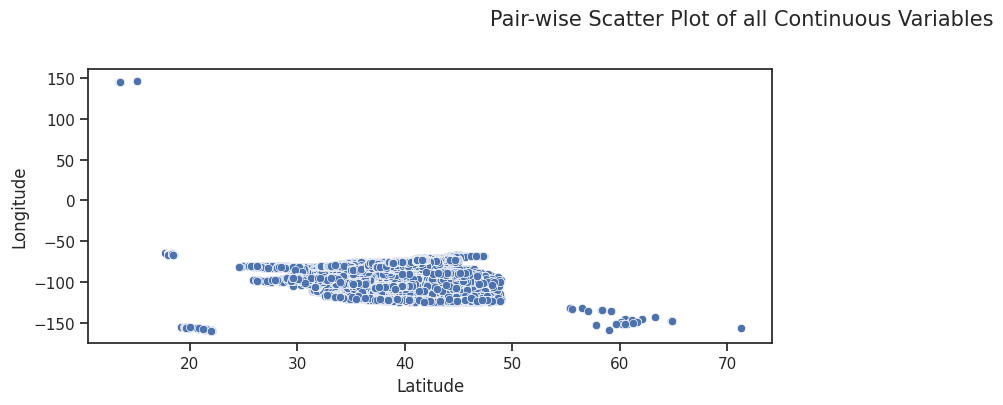

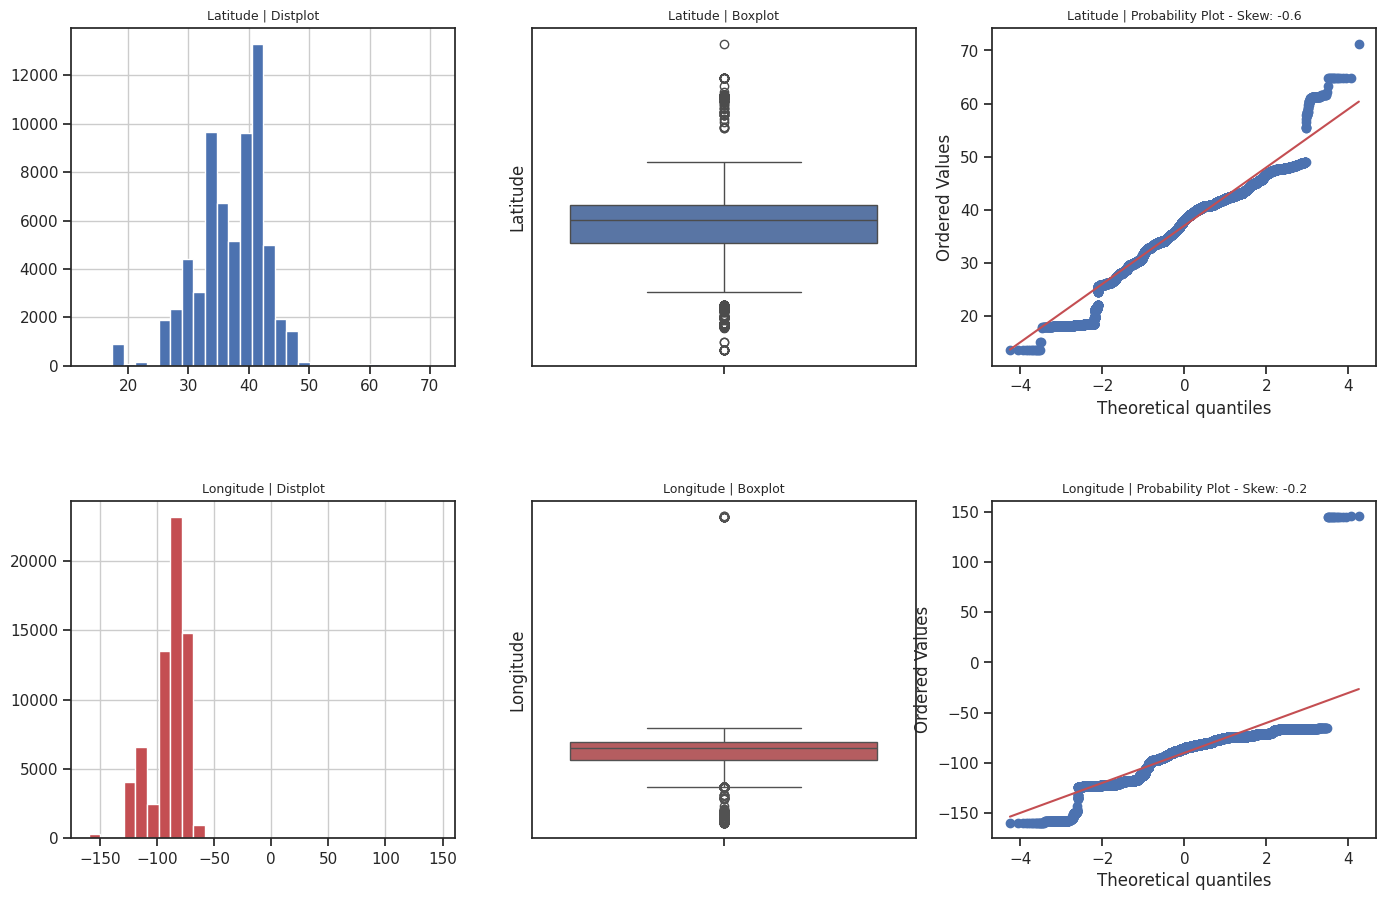

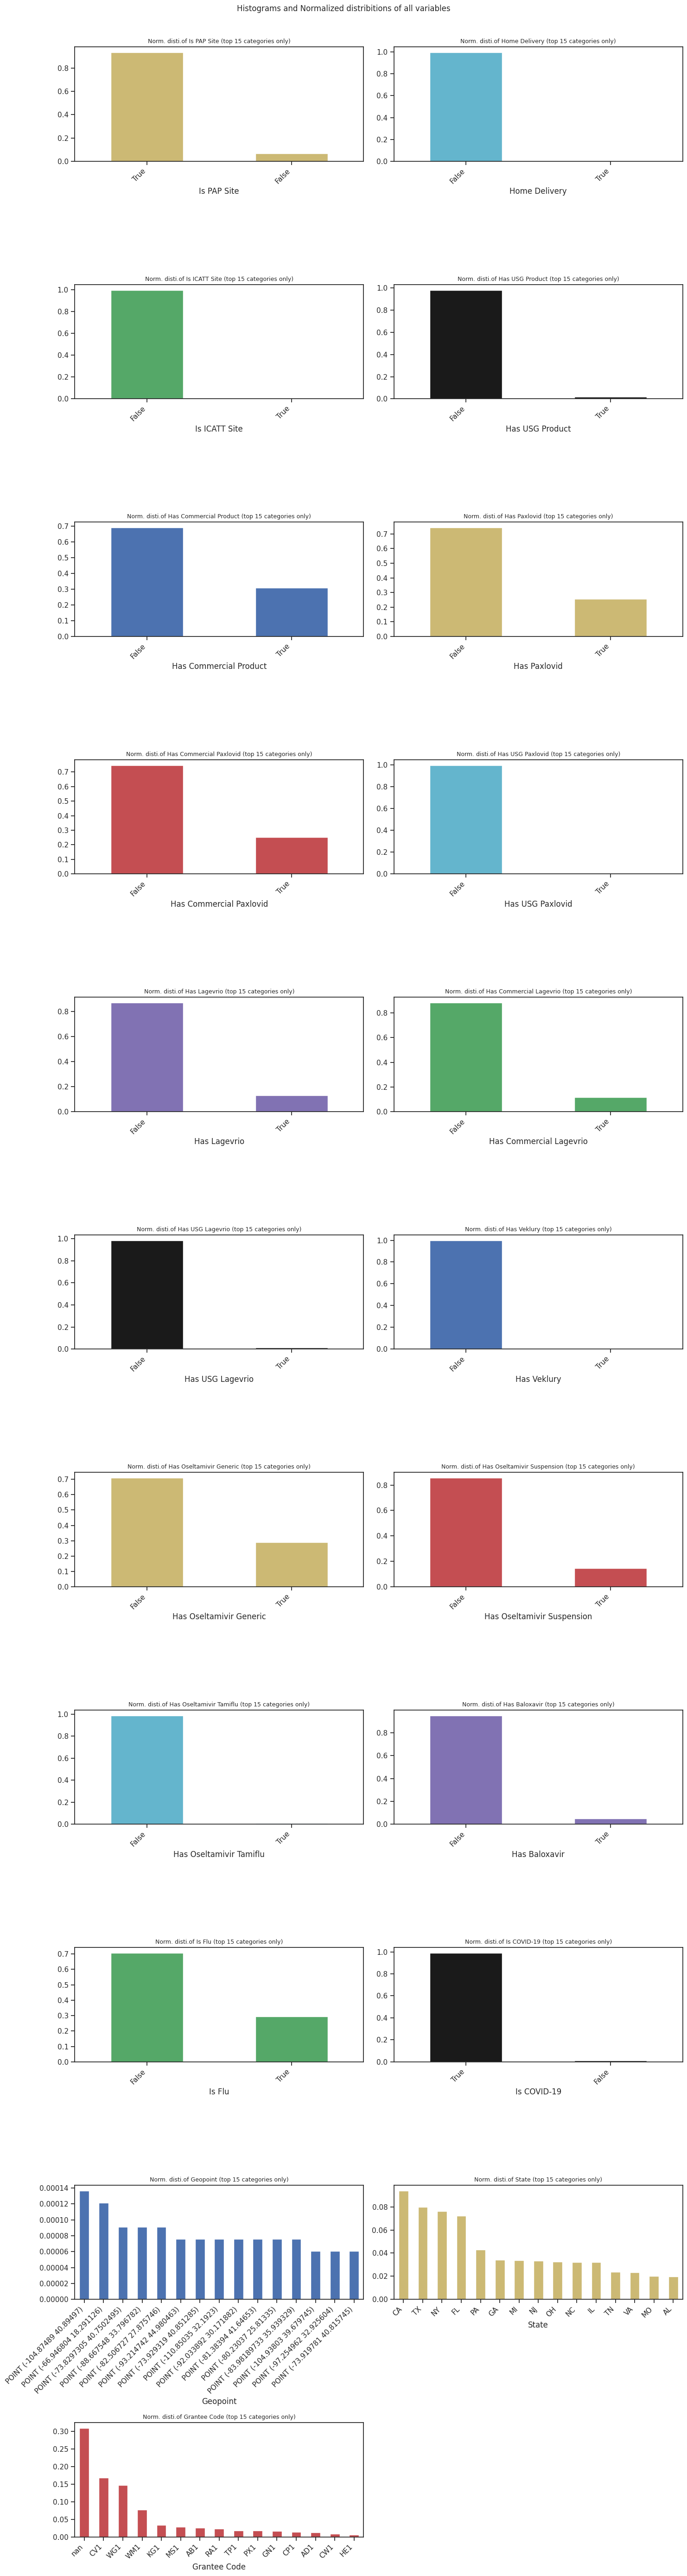

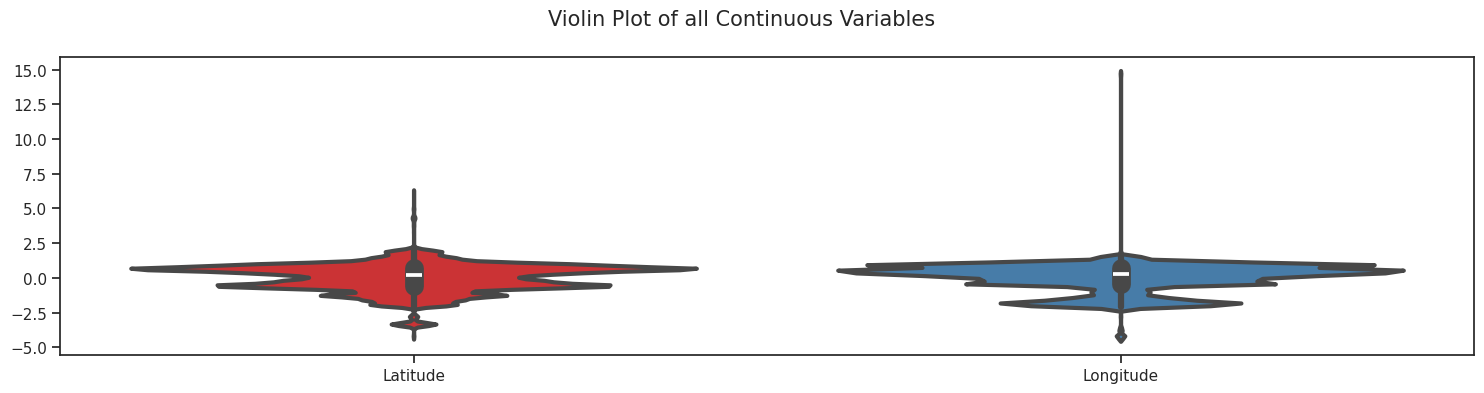

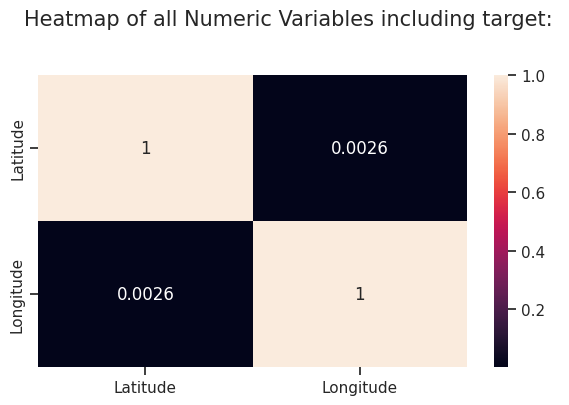

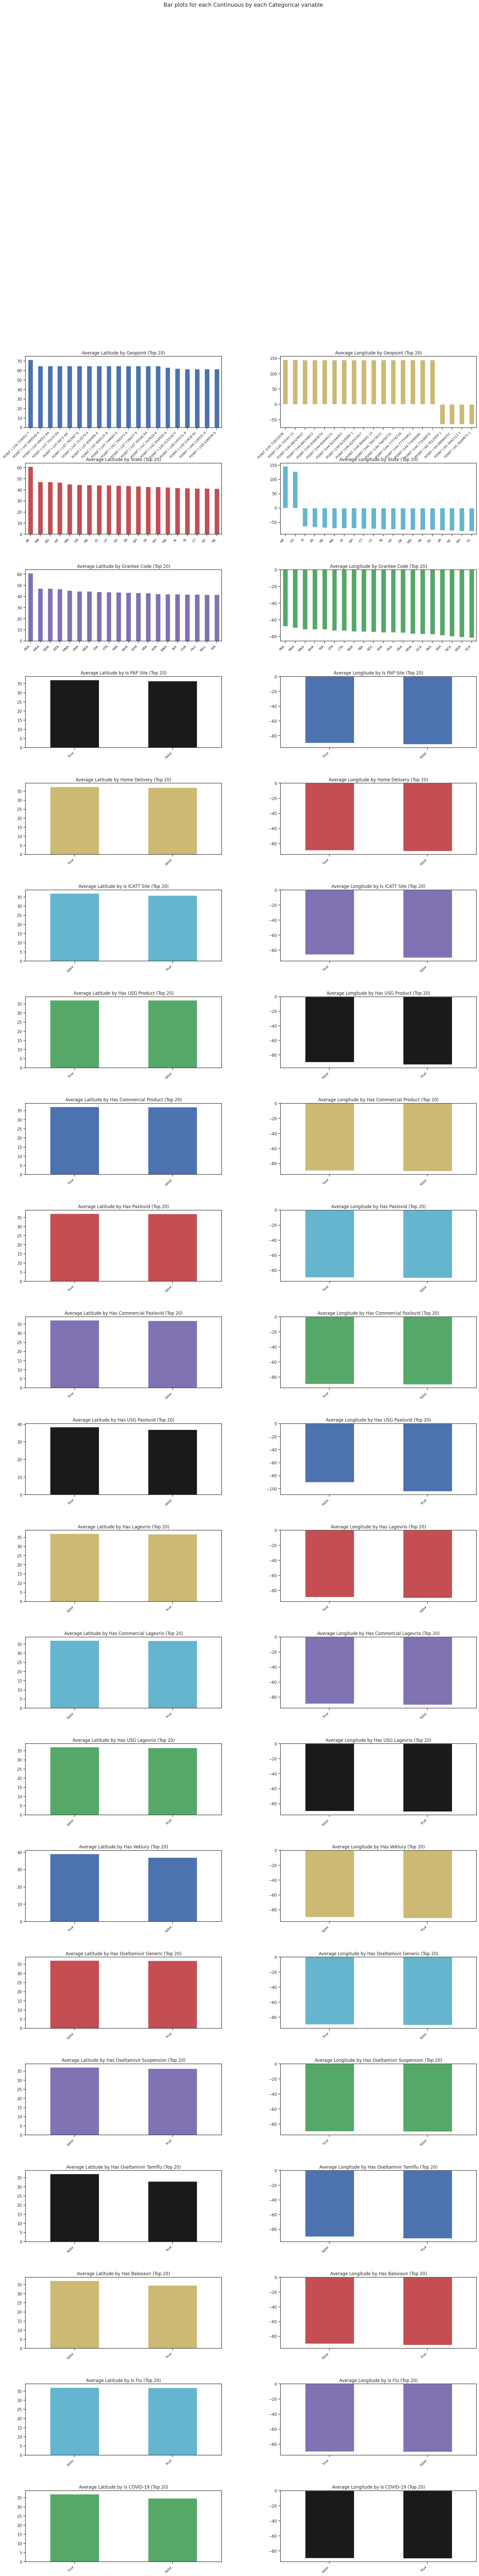

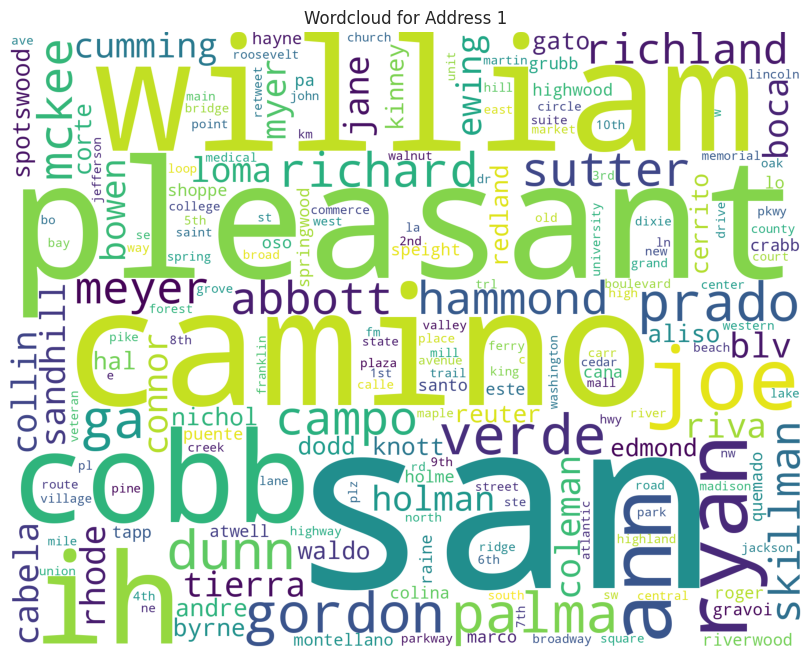

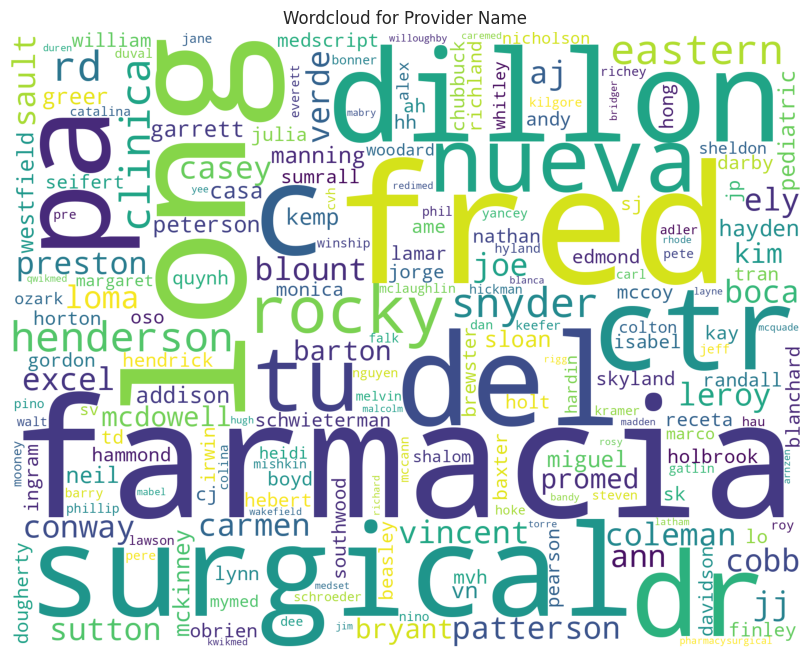

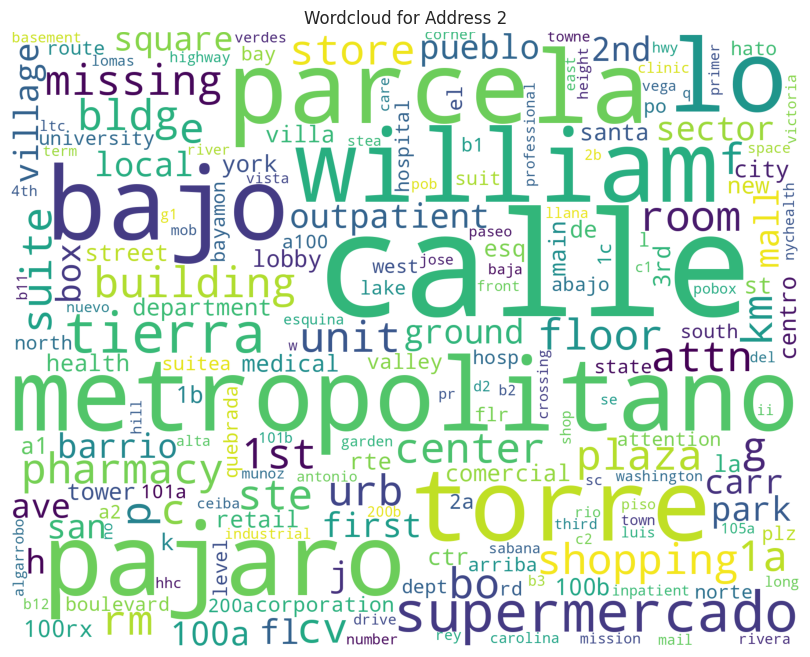

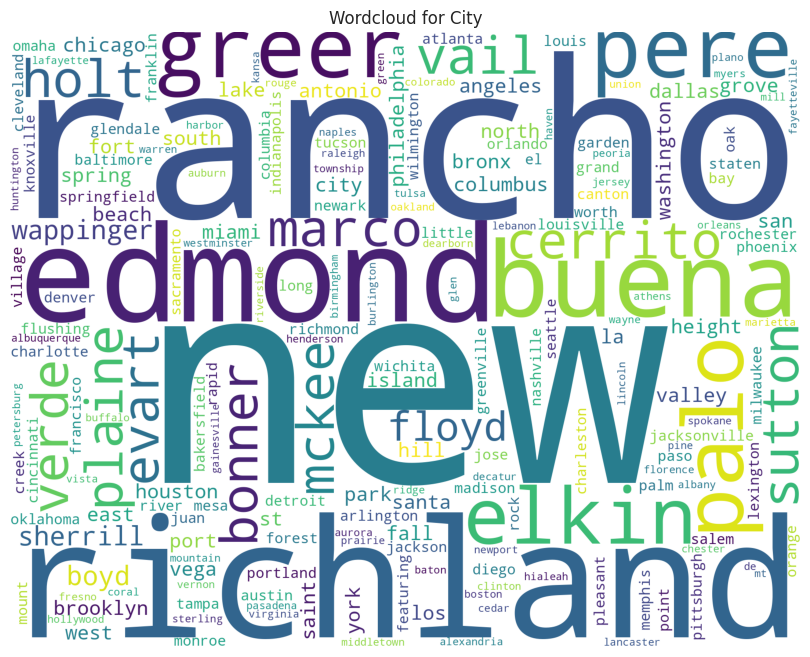

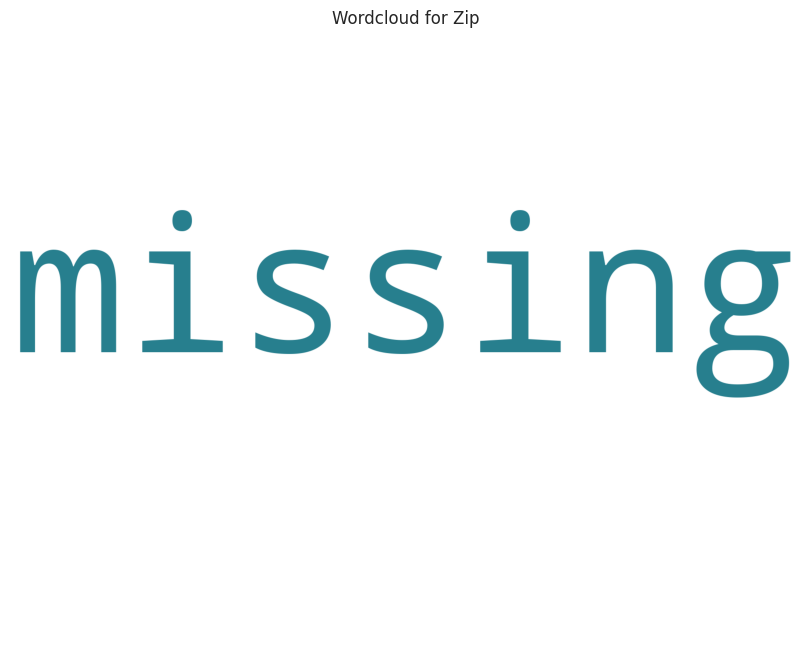

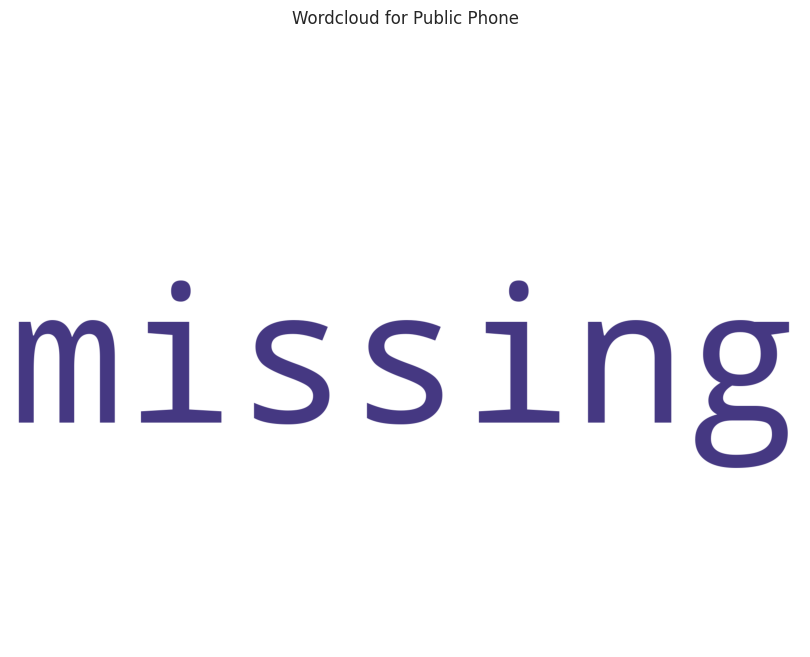

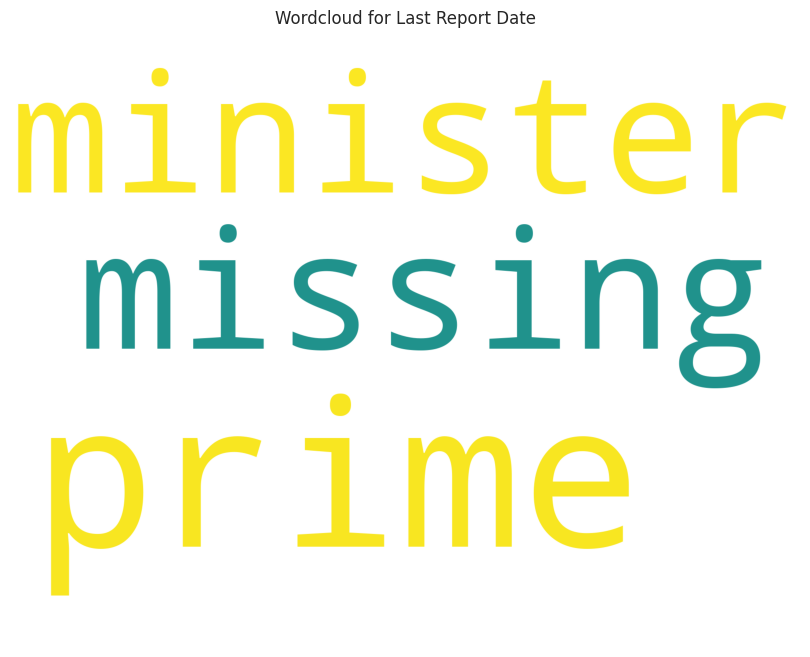

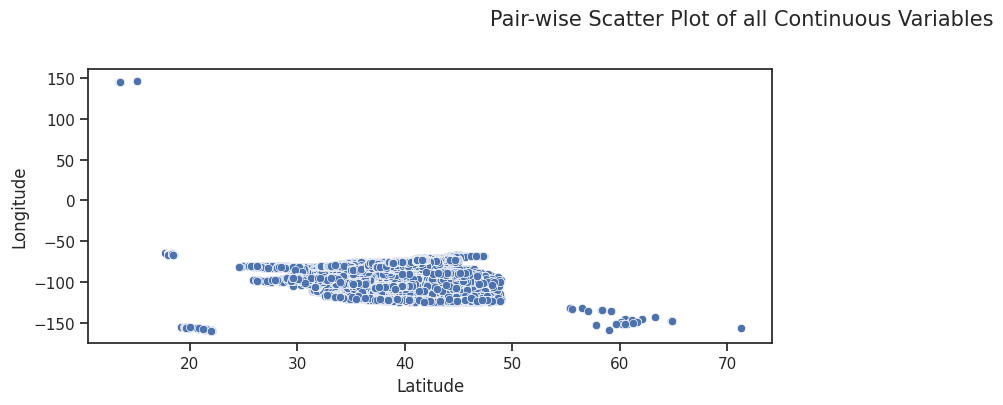

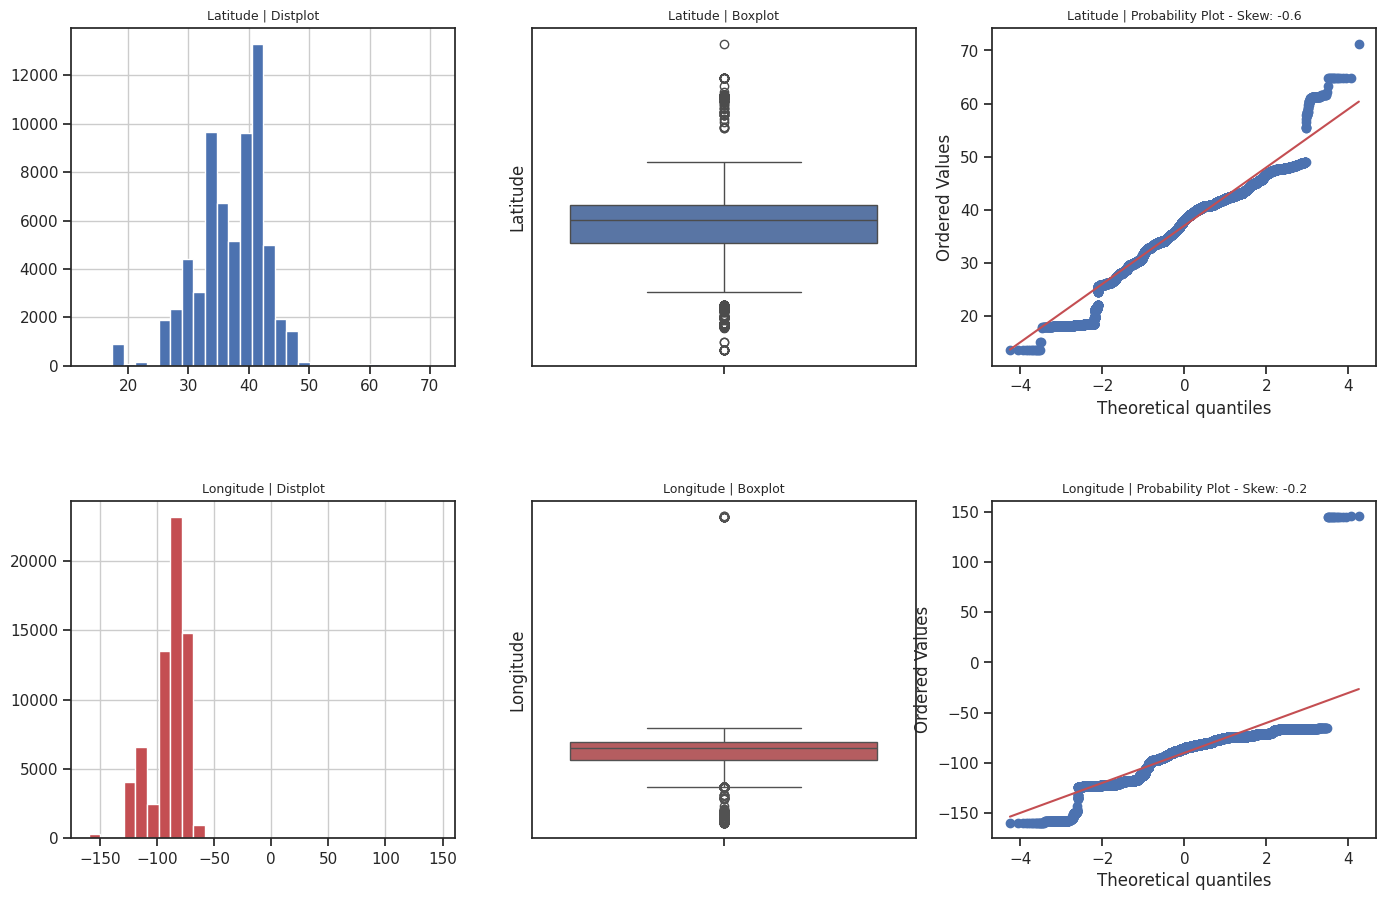

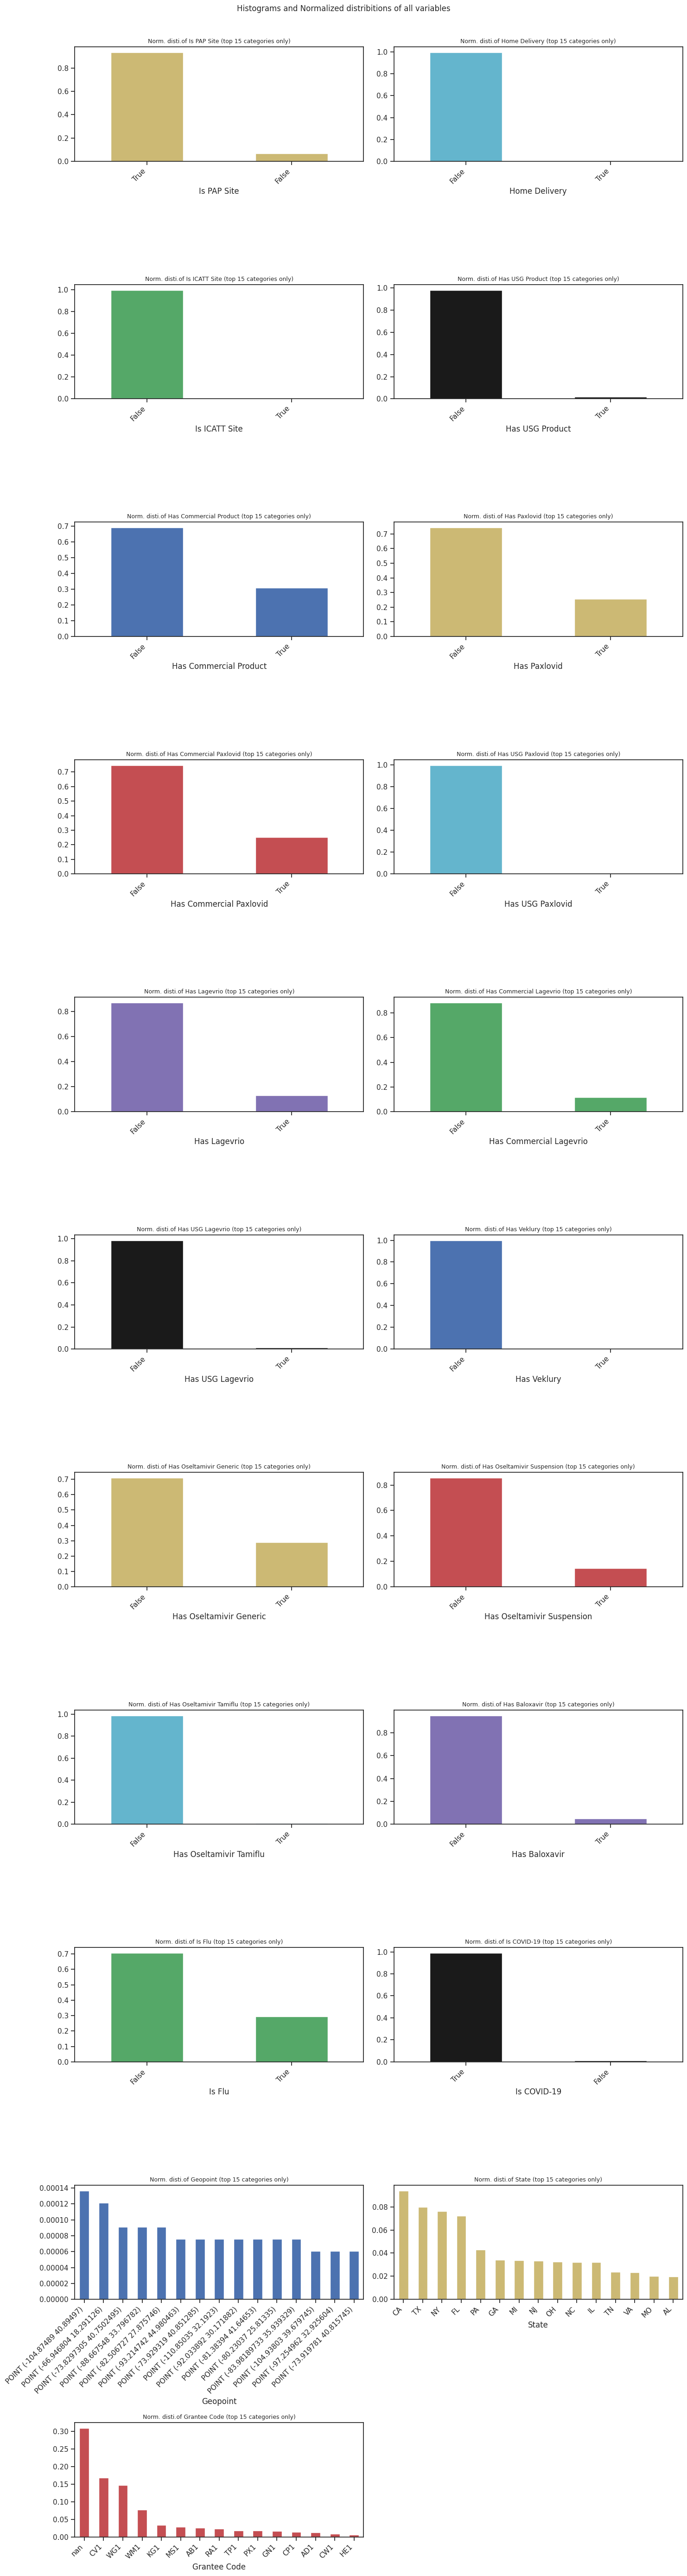

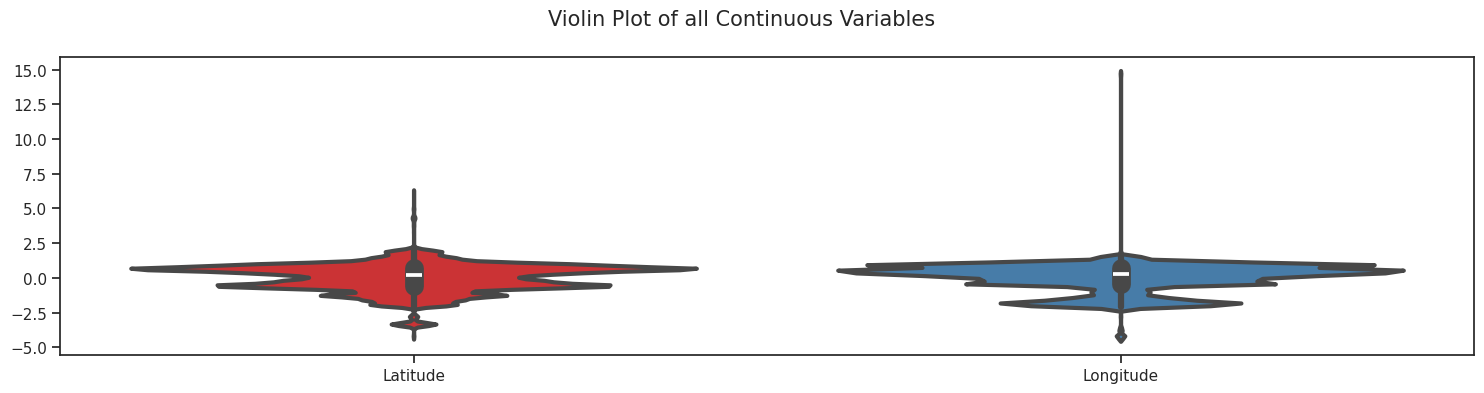

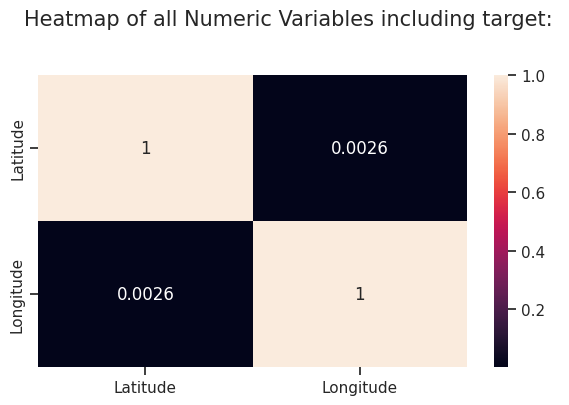

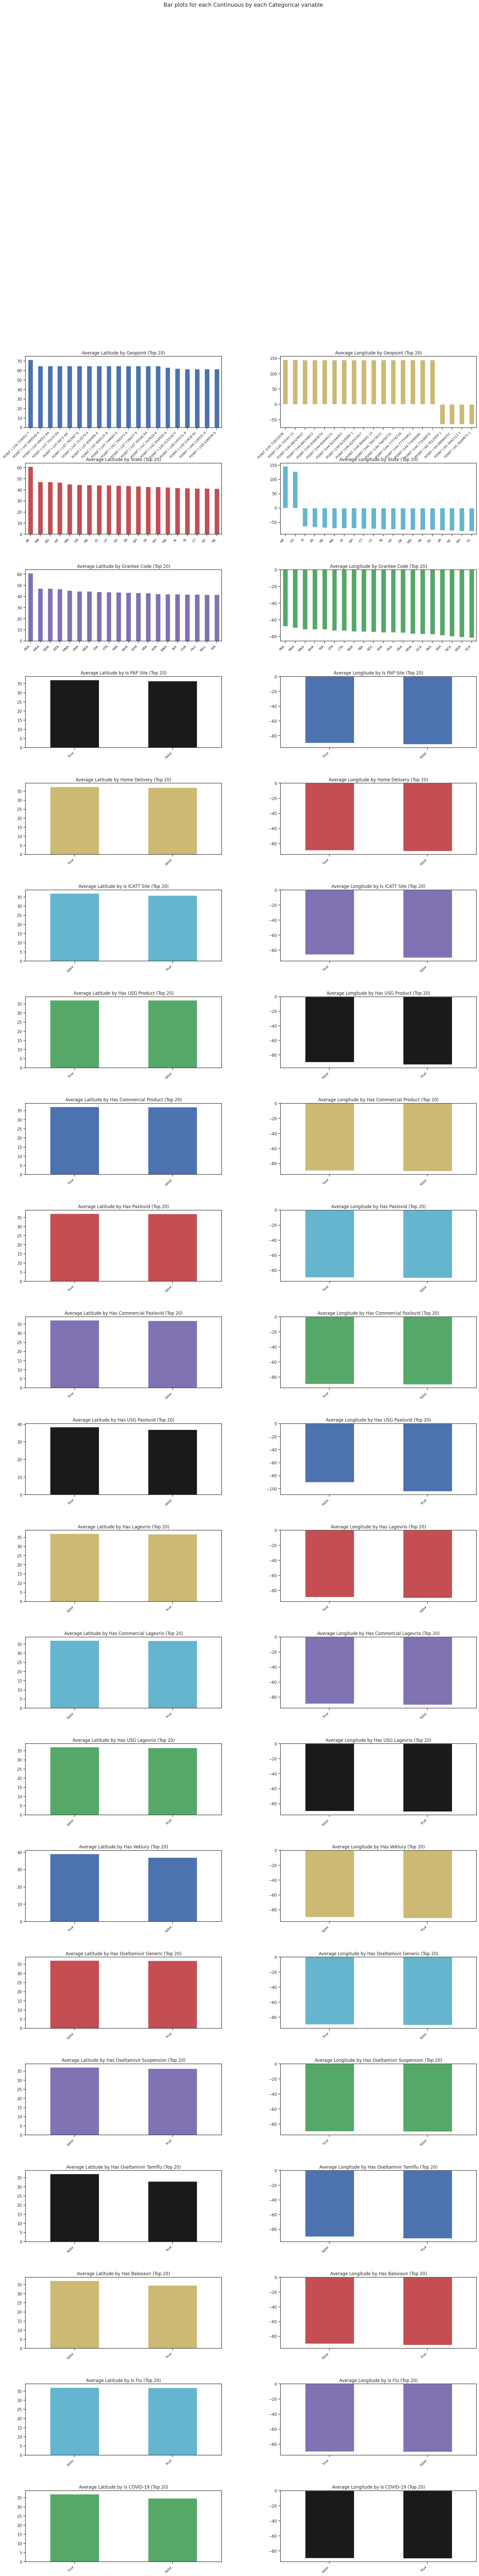

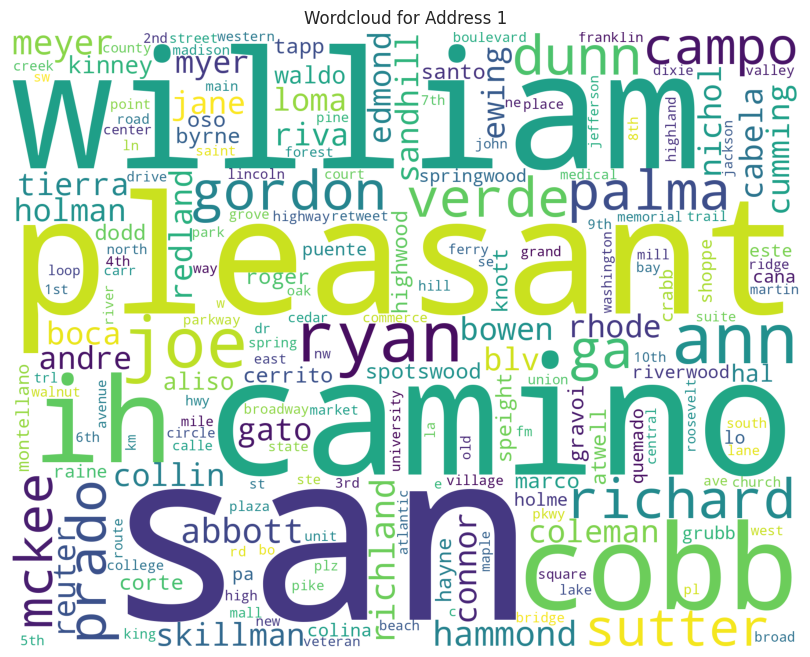

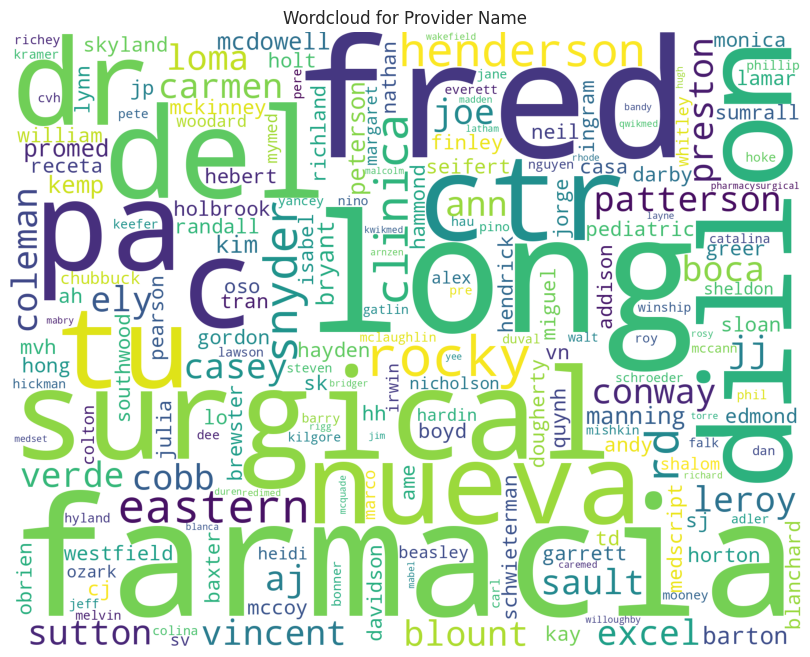

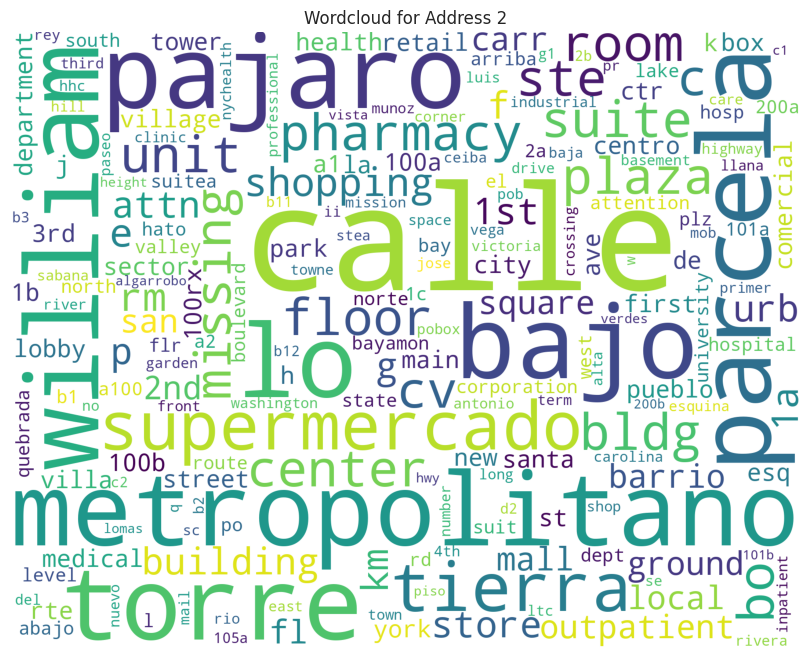

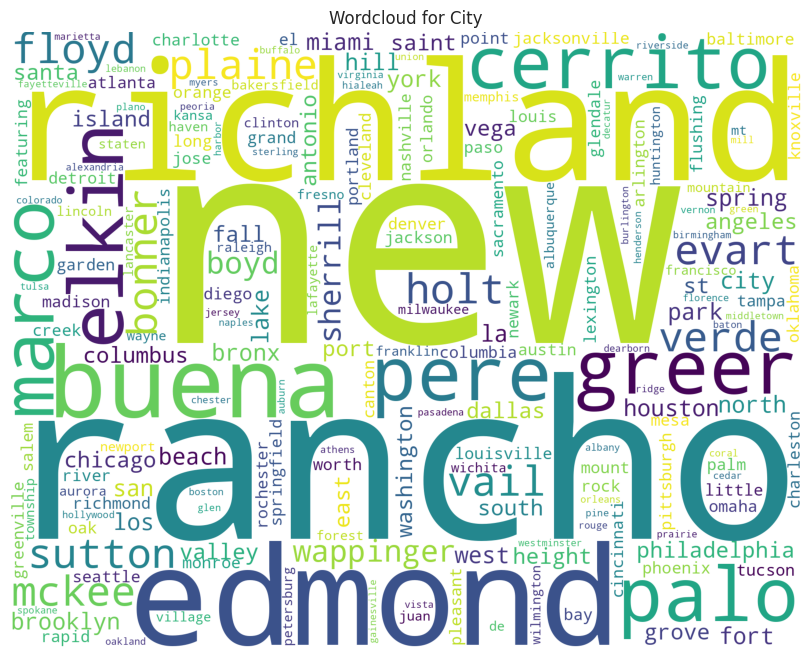

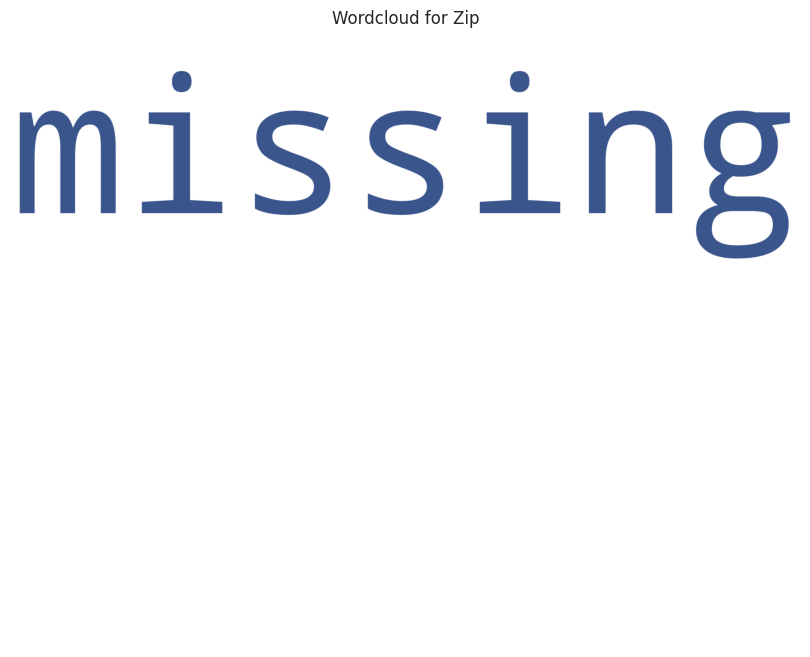

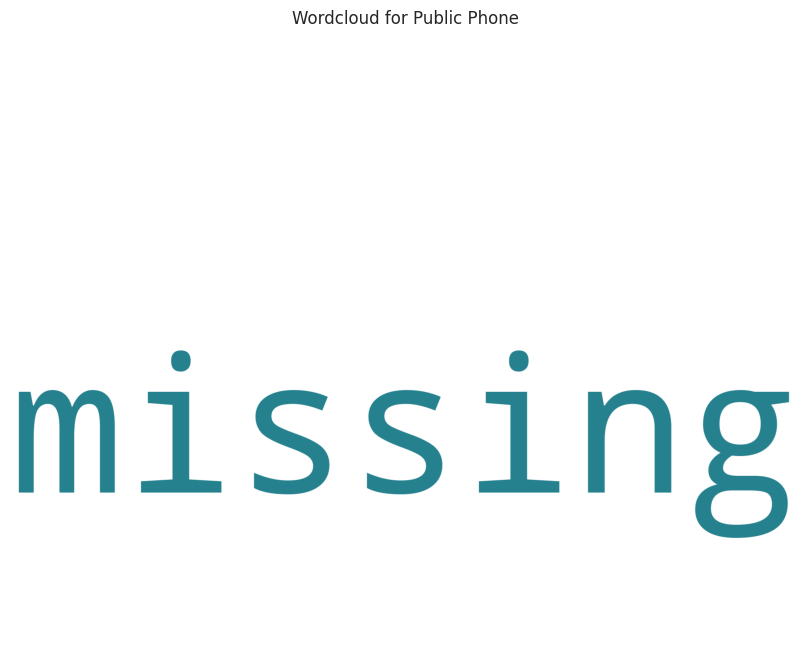

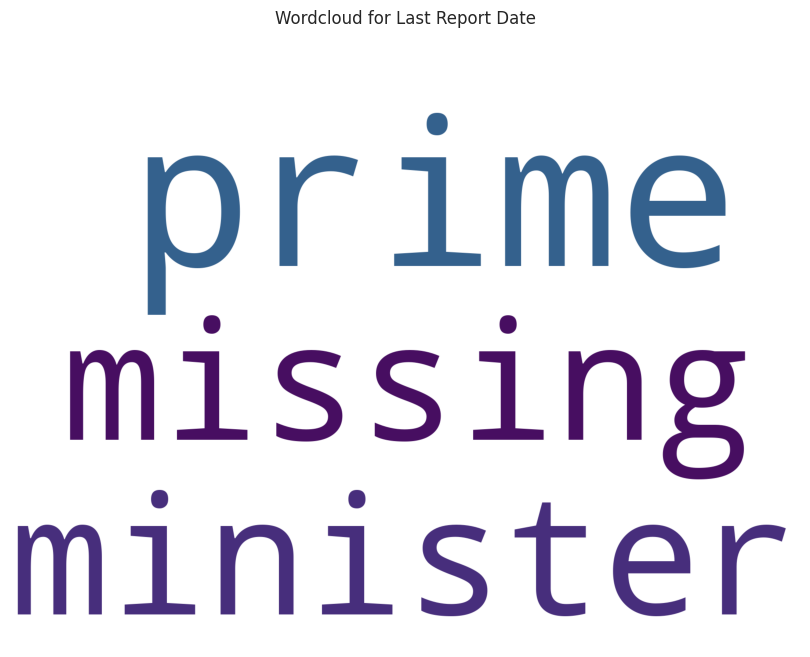

All Plots are saved in ./AutoViz_Plots/AutoViz
Time to run AutoViz = 191 seconds 


Provider Name                  Address 1            Address 2   \
0            CVS PHARMACY #05246                     110 HWY 98        NaN   
1          PUBLIX PHARMACY #0567     2517 SOUTH FEDERAL HIGHWAY        NaN   
2                WALGREENS #4379                 4320 26TH ST W        NaN   
3          PUBLIX PHARMACY #0894           6820 OKEECHOBEE BLVD        NaN   
4          PUBLIX PHARMACY #0019   731 DUVAL STATION RD SUITE 4        NaN   
...                          ...                            ...        ...   
65843        CVS PHARMACY #10415          800 MAINE AVE SW UNIT        NaN   
65844         PILL PLUS PHARMACY  4215 CONNECTICUT AVE NW # ST1        NaN   
65845  HEALING TOUCH PHARMACY 03                3415 23RD ST SE        NaN   
65846               AHF PHARMACY        650 PENNSYLVANIA AVE SE    STE 380   
65847     Walgreens Store #21497               306 HIGHWAY 37 S  Suite 200   

            City       State     Zip      Public Phone  Latitude   Longitude  \
0       PORT SAINT JOE   FL        32456           NaN  30.016430 -85.430510   
1            FT PIERCE   FL        34982           NaN  27.319630 -80.316317   
2            BRADENTON   FL   34205-3563  941-755-8596  27.462954 -82.588373   
3      WEST PALM BEACH   FL        33411           NaN  26.705894 -80.150789   
4         JACKSONVILLE   FL        32218           NaN  30.485316 -81.604614   
...                ...   ...         ...           ...        ...        ...   
65843       WASHINGTON   DC   20024-2494           NaN  38.880747 -77.026821   
65844       WASHINGTON   DC   20008-1159           NaN  38.943706 -77.062826   
65845       WASHINGTON   DC   20020-1921           NaN  38.847577 -76.971292   
65846       WASHINGTON   DC        20003           NaN  38.885394 -76.996977   
65847     MOUNT VERNON   TX        75457  903-537-2886  33.182677 -95.234542   

                 Geopoint               Last Report Date     Is PAP Site  \
0        POINT (-85.43051 30.01643)  01/17/2025 12:00:00 AM      True      
1       POINT (-80.316317 27.31963)  01/17/2025 12:00:00 AM      True      
2      POINT (-82.588373 27.462954)  01/17/2025 12:00:00 AM      True      
3      POINT (-80.150789 26.705894)  01/17/2025 12:00:00 AM      True      
4      POINT (-81.604614 30.485316)  01/17/2025 12:00:00 AM      True      
...                             ...                     ...          ...   
65843  POINT (-77.026821 38.880747)  01/17/2025 12:00:00 AM      True      
65844  POINT (-77.062826 38.943706)  01/17/2025 12:00:00 AM      True      
65845  POINT (-76.971292 38.847577)  01/17/2025 12:00:00 AM      True      
65846  POINT (-76.996977 38.885394)  01/17/2025 12:00:00 AM      True      
65847  POINT (-95.234542 33.182677)  01/17/2025 02:11:29 AM     False      

      Prescribing Services Available Appointment URL  Home Delivery  \
0                   NaN                     NaN           False       
1                   NaN                     NaN           False       
2                   NaN                     NaN           False       
3                   NaN                     NaN           False       
4                   NaN                     NaN           False       
...                              ...             ...            ...   
65843               NaN                     NaN           False       
65844               NaN                     NaN           False       
65845               NaN                     NaN           False       
65846               NaN                     NaN           False       
65847               NaN                     NaN           False       

       Is ICATT Site  Has USG Product  Has Commercial Product  Has Paxlovid  \
0          False           False                False              False      
1          False           False                False              False      
2          False           False                 True              False      
3          False           False

In [14]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
AV.AutoViz(filename="", dfte=data, depVar="", verbose=3)

In [15]:
data.sample(3)

Provider Name          Address 1      Address 2        City        \
2542    CVS PHARMACY #02903       400 OGDEN AVE     NaN       DOWNERS GROVE   
22557  COSTCO PHARMACY #180     1873 LANTANA RD     NaN             LANTANA   
34954        GIANT PHARMACY  2450 CHEMICAL ROAD     NaN    PLYMOUTH MEETING   

      State     Zip      Public Phone  Latitude   Longitude  \
2542    IL        60515  630-271-8991  41.804585 -88.052450   
22557   FL   33462-2698           NaN  26.588236 -80.071235   
34954   PA        19462  610-941-3611  40.105724 -75.291748   

                 Geopoint               Last Report Date     Is PAP Site  \
2542    POINT (-88.05245 41.804585)  01/17/2025 12:00:00 AM     True       
22557  POINT (-80.071235 26.588236)  01/17/2025 12:00:00 AM     True       
34954  POINT (-75.291748 40.105724)  01/17/2025 12:00:00 AM     True       

      Prescribing Services Available Appointment URL  Home Delivery  \
2542                NaN                     NaN           False       
22557               NaN                     NaN           False       
34954               NaN                     NaN           False       

       Is ICATT Site  Has USG Product  Has Commercial Product  Has Paxlovid  \
2542       False           False                 True               True      
22557      False           False                False              False      
34954      False           False                 True               True      

       Has Commercial Paxlovid  Has USG Paxlovid  Has Lagevrio  \
2542             True                 False           False      
22557           False                 False           False      
34954            True                 False           False      

       Has Commercial Lagevrio  Has USG Lagevrio  Has Veklury  \
2542            False                 False          False      
22557           False                 False          False      
34954           False                 False          False      

       Has Oseltamivir Generic  Has Oseltamivir Suspension  \
2542            False                       True             
22557           False                      False             
34954           False                      False             

       Has Oseltamivir Tamiflu  Has Baloxavir  Has Zanamivir  Has Peramivir  \
2542            False               False          False          False       
22557           False               False          False          False       
34954           False               False          False          False       

      Grantee Code  Is Flu  Is COVID-19  
2542       CV1        True     True      
22557      CW1       False     True      
34954      AD1       False     True

In [16]:
data.nunique()

Provider Name                     58285
Address 1                         63078
Address 2                          2181
City                               8952
State                                55
Zip                               44390
Public Phone                      20502
Latitude                          63338
Longitude                         63447
Geopoint                          63661
Last Report Date                    981
Is PAP Site                           2
Prescribing Services Available        2
Appointment URL                       1
Home Delivery                         2
Is ICATT Site                         2
Has USG Product                       2
Has Commercial Product                2
Has Paxlovid                          2
Has Commercial Paxlovid               2
Has USG Paxlovid                      2
Has Lagevrio                          2
Has Commercial Lagevrio               2
Has USG Lagevrio                      2
Has Veklury                           2
Has Oseltamivir Generic               2
Has Oseltamivir Suspension            2
Has Oseltamivir Tamiflu               2
Has Baloxavir                         2
Has Zanamivir                         1
Has Peramivir                         1
Grantee Code                         78
Is Flu                                2
Is COVID-19                           2
dtype: int64

In [23]:
data.drop(columns = ["Provider Name","Address 1","Address 2","Zip","Public Phone","Appointment URL","Prescribing Services Available"],inplace=True)
data.head()

KeyError: "['Provider Name', 'Address 1', 'Address 2', 'Zip', 'Public Phone'] not found in axis"

In [24]:
X = data.drop(columns = ["Is COVID-19"])
y = data["Is COVID-19"]

In [32]:
X = X.dropna(axis=1)

In [35]:
print(X.shape)
print(y.shape)

(65848, 22)
(65848,)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report
from sklearn.model_selection import RandomizedSearchCV